<a href="https://www.kaggle.com/code/mansipanchal24/race-telemetry?scriptVersionId=191435705" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fm7-rio-de-janeiro-race-telemetry/telemetry-rio-5-laps.csv


In [2]:
race_df = pd.read_csv('/kaggle/input/fm7-rio-de-janeiro-race-telemetry/telemetry-rio-5-laps.csv')
race_df.drop(race_df.columns[0], axis=1, inplace = True)
race_df.head()

,since_last_ns,timestamp_ms,current_engine_rpm,wheel_rotation_speed_front_left,wheel_rotation_speed_front_right,wheel_rotation_speed_rear_left,wheel_rotation_speed_rear_right,wheel_on_rumble_strip_front_left,wheel_on_rumble_strip_front_right,wheel_on_rumble_strip_rear_left,...,clutch,handbrake,gear,steer,lap_number,best_lap_time,last_lap_time,current_lap_time,current_race_time,race_position
0,0,27901812,4985.9053,66.646460,66.550380,65.249550,65.155790,False,False,False,...,0,0,2,1,0,0.0,0.0,0.000000,0.000000,1
1,7438900,27901828,4985.5083,66.634400,66.541245,65.254670,65.164270,False,False,False,...,0,0,2,1,0,0.0,0.0,0.008331,0.008331,1
2,8171000,27901828,4964.7420,66.630806,66.537970,65.239240,65.138350,False,False,False,...,0,0,2,1,0,0.0,0.0,0.016670,0.016670,1
3,8336100,27901843,4949.4760,66.613190,66.528110,65.206604,65.110146,False,False,False,...,0,0,2,1,0,0.0,0.0,0.025003,0.025003,1
4,8430500,27901843,4939.9850,66.604416,66.525300,65.134160,65.053990,False,False,False,...,0,0,2,1,0,0.0,0.0,0.033348,0.033348,1


In [3]:
race_df.describe(include = 'all')

,since_last_ns,timestamp_ms,current_engine_rpm,wheel_rotation_speed_front_left,wheel_rotation_speed_front_right,wheel_rotation_speed_rear_left,wheel_rotation_speed_rear_right,wheel_on_rumble_strip_front_left,wheel_on_rumble_strip_front_right,wheel_on_rumble_strip_rear_left,...,clutch,handbrake,gear,steer,lap_number,best_lap_time,last_lap_time,current_lap_time,current_race_time,race_position
count,9.451900e+04,9.451900e+04,94519.000000,94519.000000,94519.000000,94519.000000,94519.000000,94519,94519,94519,...,94519.0,94519.000000,94519.000000,94519.000000,94519.000000,94519.000000,94519.000000,94519.000000,94519.000000,94519.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94284,93926,94270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8.334302e+06,2.829569e+07,5495.815953,116.471991,116.636347,117.143681,117.499726,NaN,NaN,NaN,...,0.0,0.089030,3.325681,-0.406130,1.978481,125.727530,125.815190,78.566784,393.875511,1.0
std,3.268981e+05,2.274057e+05,1222.555635,32.722553,32.545618,32.529608,33.354713,NaN,NaN,NaN,...,0.0,4.763916,0.725515,81.893547,1.414813,63.994121,64.019286,45.518761,227.405753,0.0
min,0.000000e+00,2.790181e+07,1409.790900,18.166954,29.800272,21.423563,2.025307,NaN,NaN,NaN,...,0.0,0.000000,1.000000,-127.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,8.231000e+06,2.809876e+07,4619.970450,90.796715,92.130205,92.548887,92.226977,NaN,NaN,NaN,...,0.0,0.000000,3.000000,-57.000000,1.000000,155.704850,155.704850,39.153138,196.942105,1.0
50%,8.330200e+06,2.829569e+07,5576.617700,117.346510,117.645820,117.499664,118.083080,NaN,NaN,NaN,...,0.0,0.000000,3.000000,0.000000,2.000000,155.704850,158.160490,78.544266,393.867520,1.0
75%,8.431500e+06,2.849262e+07,6439.136350,143.308360,142.791505,143.975325,143.324705,NaN,NaN,NaN,...,0.0,0.000000,4.000000,50.000000,3.000000,160.796810,158.836640,117.929530,590.809530,1.0


In [4]:
race_df.isnull().sum()

since_last_ns                       0
timestamp_ms                        0
current_engine_rpm                  0
wheel_rotation_speed_front_left     0
wheel_rotation_speed_front_right    0
                                   ..
best_lap_time                       0
last_lap_time                       0
current_lap_time                    0
current_race_time                   0
race_position                       0
Length: 72, dtype: int64

In [5]:
race_df.shape

(94519, 72)

In [6]:
race_df.columns

Index(['since_last_ns', 'timestamp_ms', 'current_engine_rpm',
       'wheel_rotation_speed_front_left', 'wheel_rotation_speed_front_right',
       'wheel_rotation_speed_rear_left', 'wheel_rotation_speed_rear_right',
       'wheel_on_rumble_strip_front_left', 'wheel_on_rumble_strip_front_right',
       'wheel_on_rumble_strip_rear_left', 'wheel_on_rumble_strip_rear_right',
       'wheel_in_puddle_depth_front_left', 'wheel_in_puddle_depth_front_right',
       'wheel_in_puddle_depth_rear_left', 'wheel_in_puddle_depth_rear_right',
       'tire_slip_rotation_front_left', 'tire_slip_rotation_front_right',
       'tire_slip_rotation_rear_left', 'tire_slip_rotation_rear_right',
       'tire_slip_angle_front_left', 'tire_slip_angle_front_right',
       'tire_slip_angle_rear_left', 'tire_slip_angle_rear_right',
       'tire_combined_slip_front_left', 'tire_combined_slip_front_right',
       'tire_combined_slip_rear_left', 'tire_combined_slip_rear_right',
       'tire_temp_front_left', 'tire_temp_

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

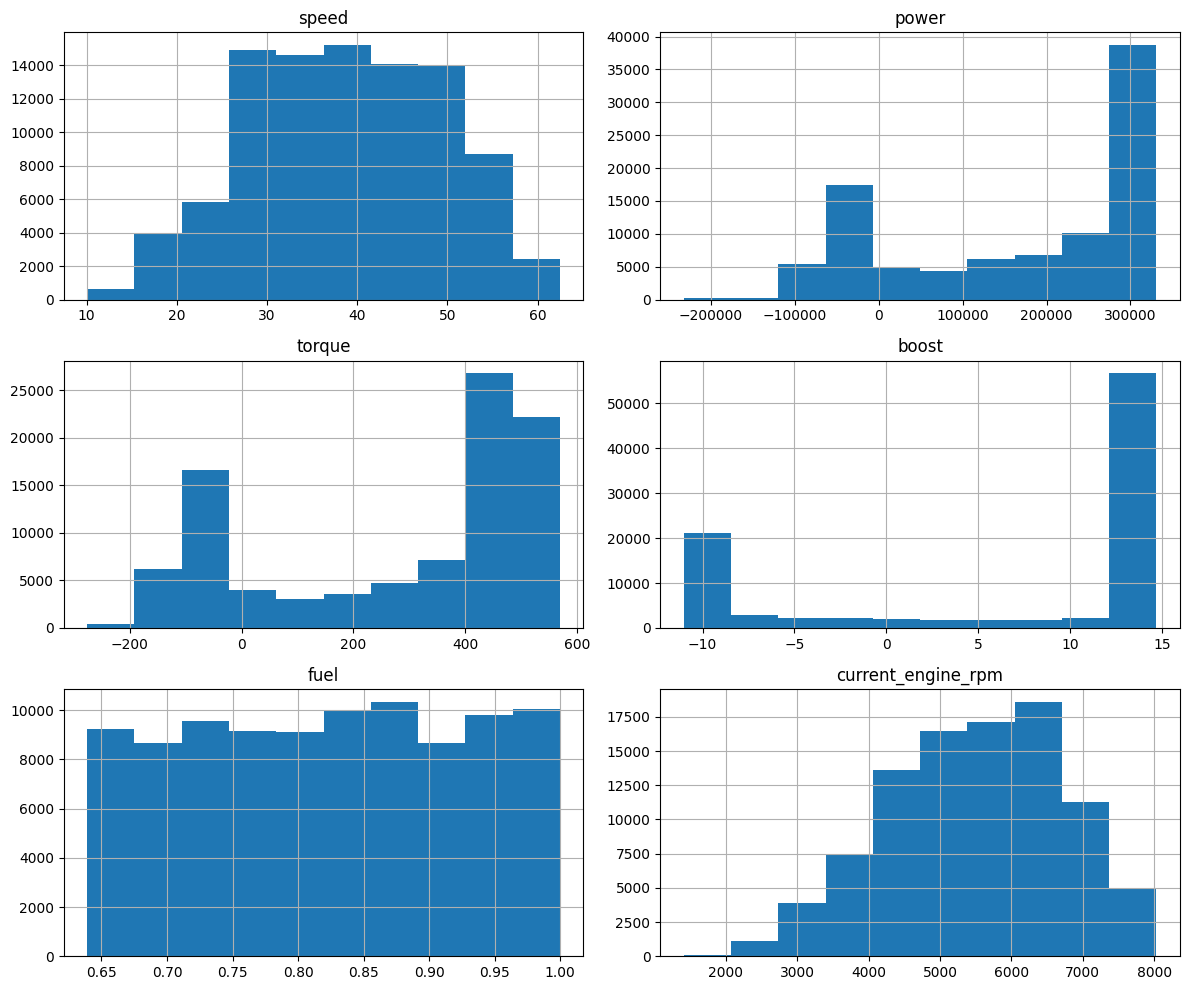

In [8]:
race_df[['speed', 'power', 'torque', 'boost', 'fuel', 'current_engine_rpm']].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

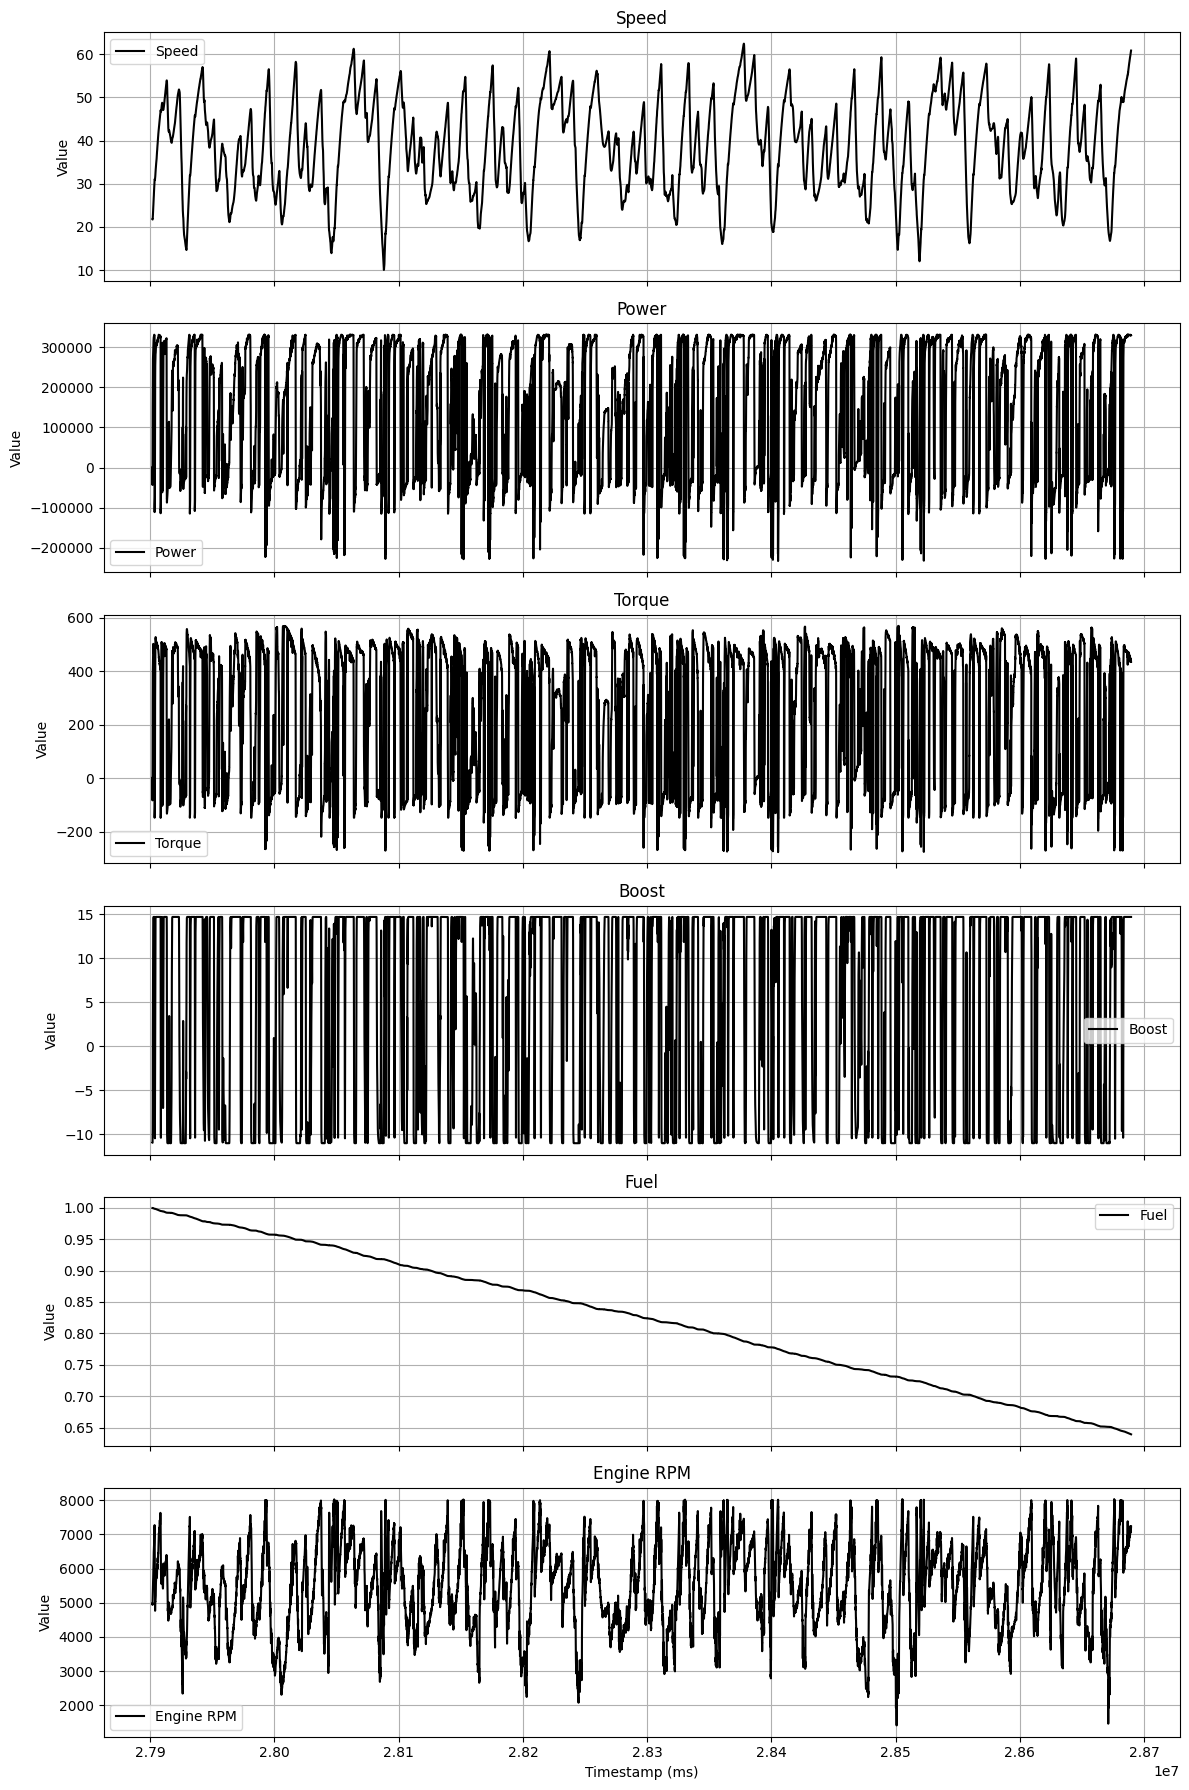

In [9]:
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12, 18), sharex=True)


metrics = ['speed', 'power', 'torque', 'boost', 'fuel', 'current_engine_rpm']
labels = ['Speed', 'Power', 'Torque', 'Boost', 'Fuel', 'Engine RPM']

for i, metric in enumerate(metrics):
    axs[i].plot(race_df['timestamp_ms'], race_df[metric], label=labels[i], color='k')
    axs[i].set_title(labels[i])
    axs[i].set_ylabel('Value')
    axs[i].legend()
    axs[i].grid(True)


axs[-1].set_xlabel('Timestamp (ms)')


plt.tight_layout()

plt.show()

In [10]:
pos = ['position_x', 'position_z']
lap1 = race_df[race_df['lap_number'] == 0][pos]
lap2 = race_df[race_df['lap_number'] == 1][pos]
lap3 = race_df[race_df['lap_number'] == 2][pos]
lap4 = race_df[race_df['lap_number'] == 3][pos]
lap5 = race_df[race_df['lap_number'] == 4][pos]

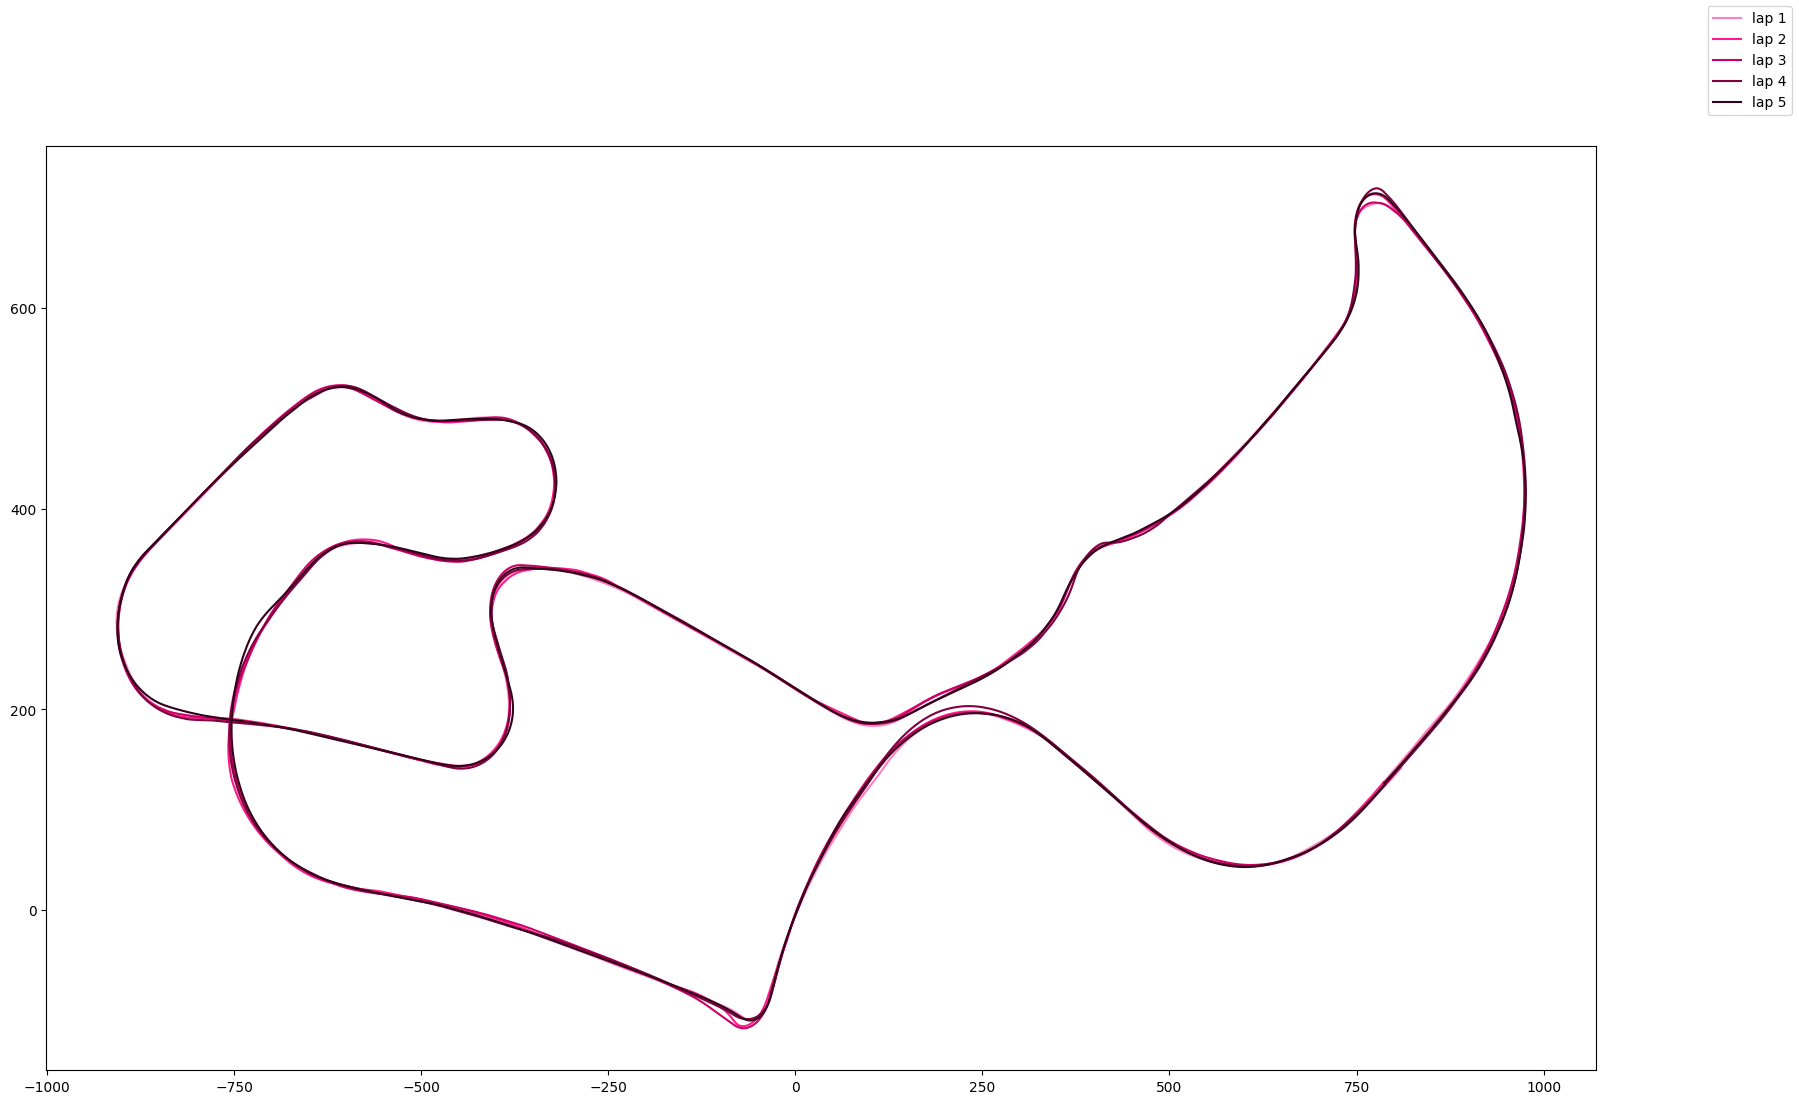

In [11]:
fig = plt.figure(figsize=(20,12))

ax = fig.add_subplot()

ax.plot(lap1['position_x'], lap1['position_z'], c='#ff80bf', label='lap 1')
ax.plot(lap2['position_x'], lap2['position_z'], c='#ff1a8c', label='lap 2')
ax.plot(lap3['position_x'], lap3['position_z'], c='#cc0066', label='lap 3')
ax.plot(lap4['position_x'], lap4['position_z'], c='#800040', label='lap 4')
ax.plot(lap5['position_x'], lap5['position_z'], c='#33001a', label='lap 5')

fig.legend()

In [12]:
lap_times = {}
for lap in range(0,max(race_df['lap_number'])+1):
    current_lap = race_df[race_df['lap_number'] == lap]
    time_of_lap = max(current_lap['current_lap_time'])
    lap_times[lap] = time_of_lap
print(lap_times)

{0: 160.78926, 1: 158.15445, 2: 155.69756, 3: 158.82985, 4: 153.11324}


In [13]:
best_lap = min(lap_times, key=lap_times.get)
best_time = lap_times[best_lap]

worst_lap = max(lap_times, key=lap_times.get)
worst_time = lap_times[worst_lap]

In [14]:
print('Best lap and its time duration: ', best_lap,best_time)
print('Worst lap and its time duration: ', worst_lap,worst_time)

Best lap and its time duration:  4 153.11324
Worst lap and its time duration:  0 160.78926


In [15]:
lap1_data = race_df[race_df['lap_number']==0]
lap1_data.head()

,since_last_ns,timestamp_ms,current_engine_rpm,wheel_rotation_speed_front_left,wheel_rotation_speed_front_right,wheel_rotation_speed_rear_left,wheel_rotation_speed_rear_right,wheel_on_rumble_strip_front_left,wheel_on_rumble_strip_front_right,wheel_on_rumble_strip_rear_left,...,clutch,handbrake,gear,steer,lap_number,best_lap_time,last_lap_time,current_lap_time,current_race_time,race_position
0,0,27901812,4985.9053,66.646460,66.550380,65.249550,65.155790,False,False,False,...,0,0,2,1,0,0.0,0.0,0.000000,0.000000,1
1,7438900,27901828,4985.5083,66.634400,66.541245,65.254670,65.164270,False,False,False,...,0,0,2,1,0,0.0,0.0,0.008331,0.008331,1
2,8171000,27901828,4964.7420,66.630806,66.537970,65.239240,65.138350,False,False,False,...,0,0,2,1,0,0.0,0.0,0.016670,0.016670,1
3,8336100,27901843,4949.4760,66.613190,66.528110,65.206604,65.110146,False,False,False,...,0,0,2,1,0,0.0,0.0,0.025003,0.025003,1
4,8430500,27901843,4939.9850,66.604416,66.525300,65.134160,65.053990,False,False,False,...,0,0,2,1,0,0.0,0.0,0.033348,0.033348,1


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

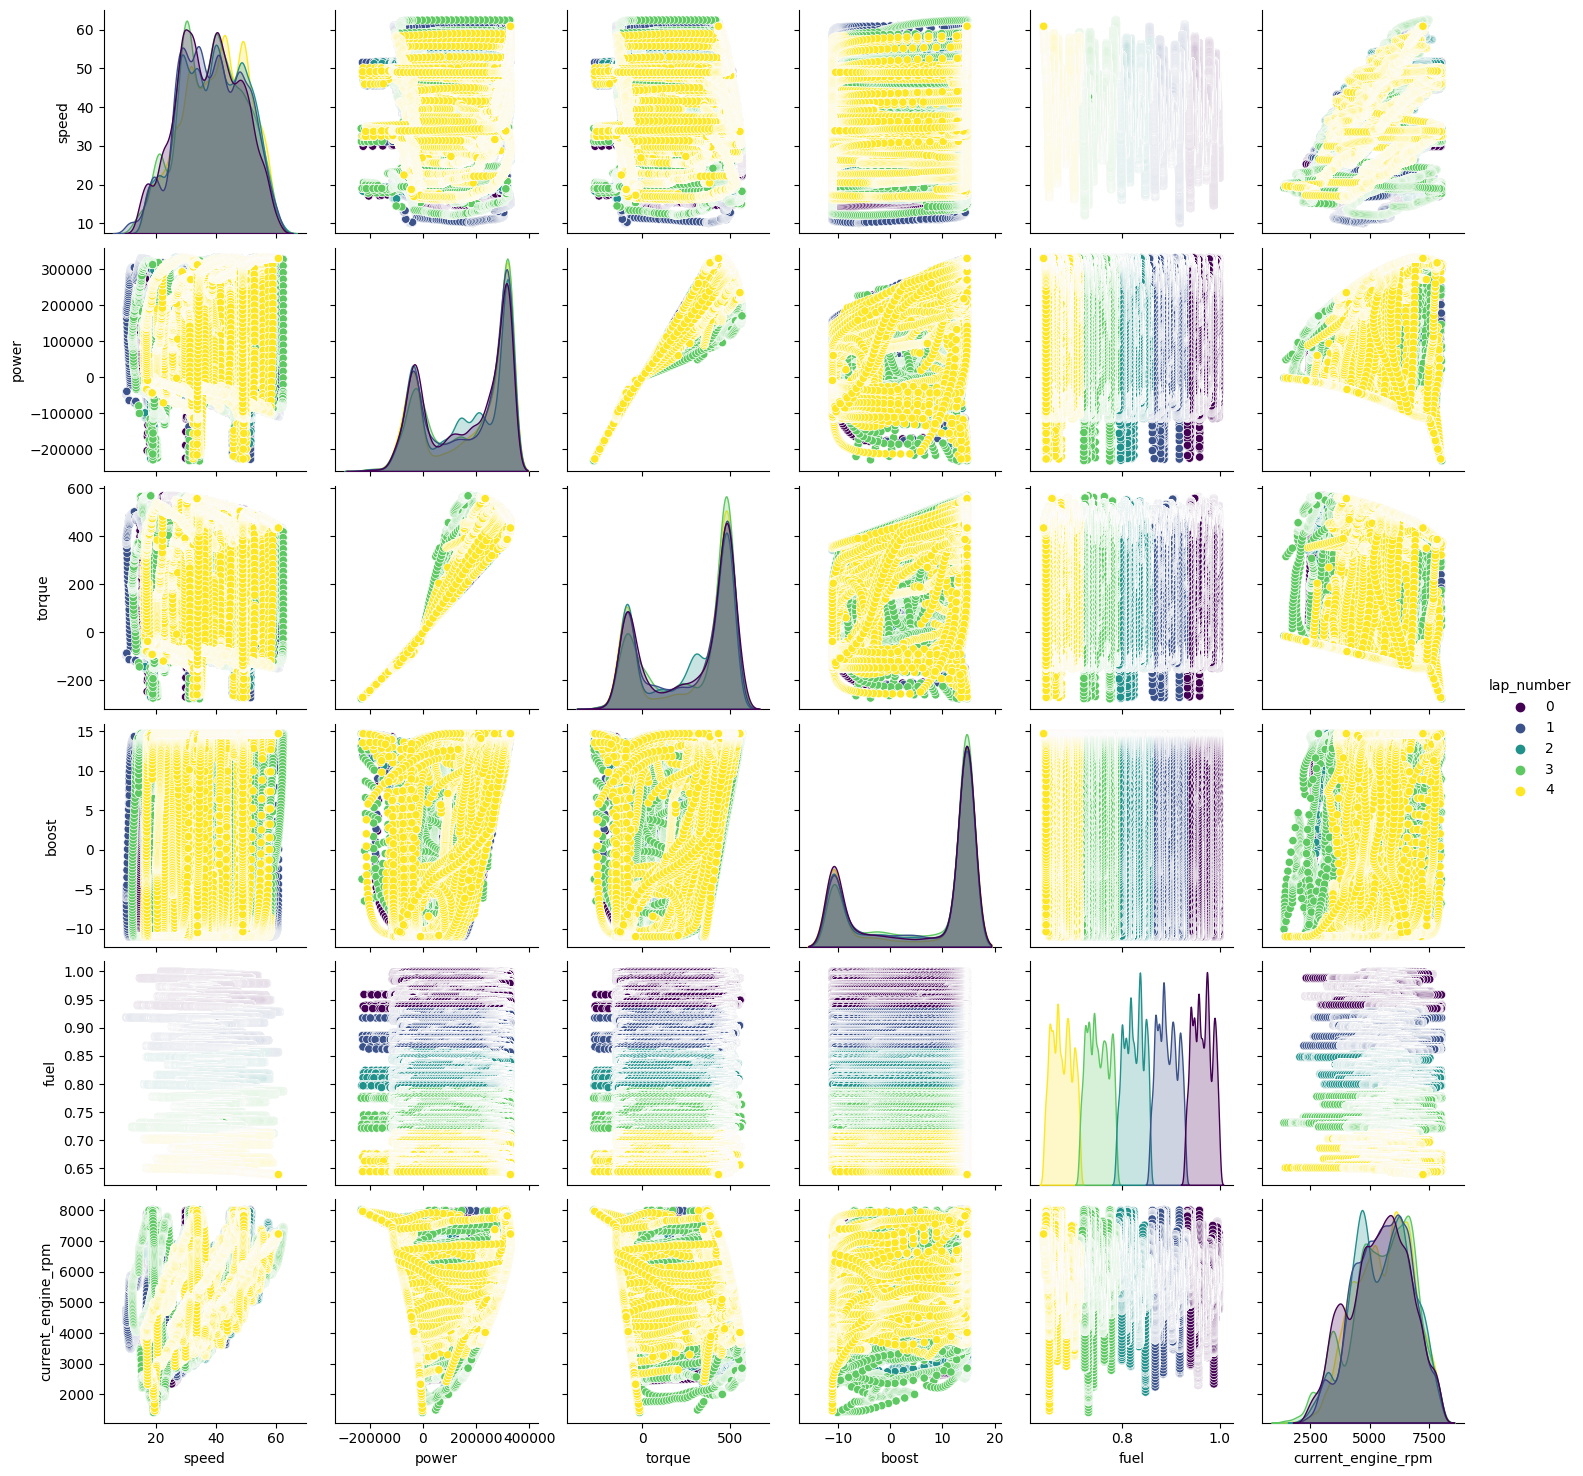

In [16]:
df = race_df[['speed', 'power', 'torque', 'boost', 'fuel', 'current_engine_rpm', 'lap_number']]
sns.pairplot(df, hue='lap_number', diag_kind='kde', palette='viridis')